In [ ]:
from Bitcoin_MonteCarlo import TimeSeries_MonteCarlo
import numpy as np

trading_days = 365
horizon = 365
model = 'Returns'
simulations = 100
options_info = dict(type='Asian', strike='geometric', interval=4) # Only necessary if model='Options', can be European or Asian.
risk_free_rate = .03
ticker = 'BTC-USD'
arch_garch = dict(vol='GARCH', p=1, q=1, mean="Zero", rescale=True, dist='normal') # These are default values, can be changed
arima = dict(information_criterion='bic') # These are default values, can be changed
period = 'max' # Can also have a start/end data,  dict(start='2000-01-01',end='2015-01-01')

TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()

Beginning Simulations...
Completed Simulation # 1


Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10

10 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 8.33 second(s)
-------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $2,002.26
Profit/Loss Ranges from $-2,334.44 - $7,200.61
Probability of Earning a Return = 60.00%
The VaR at 95% Confidence is: $-2,334.44
-------------------------------------------------------------------------


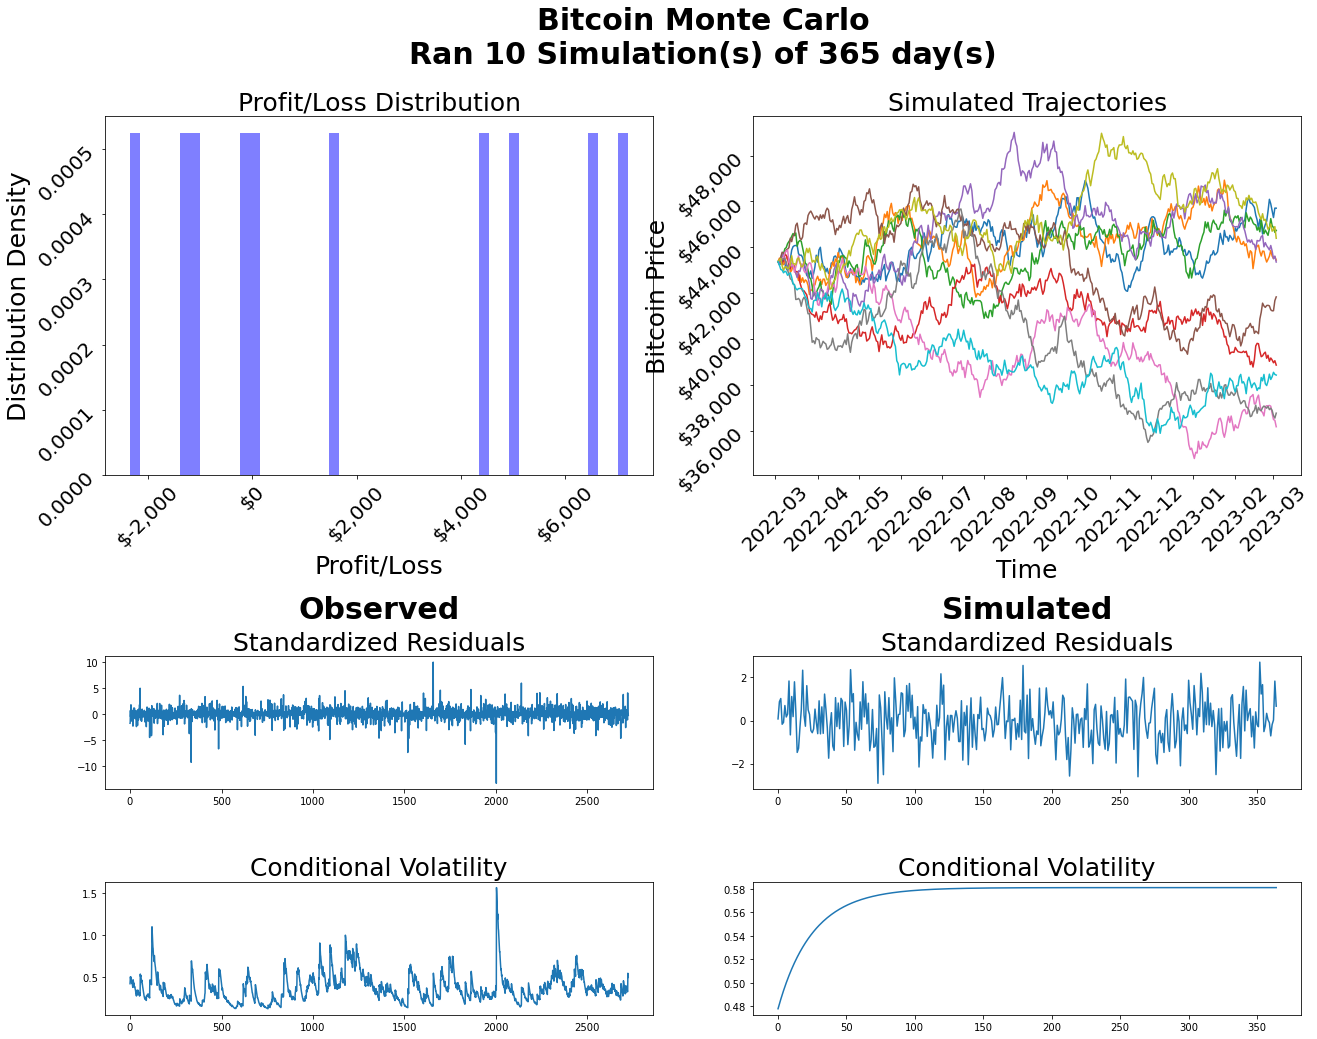

In [2]:
arch_garch = dict(vol='GARCH', p=1, q=1, mean="Zero", rescale=True, dist='t') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()


Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10

10 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 9.71 second(s)
-------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $1,172.71
Profit/Loss Ranges from $-11,213.90 - $5,717.95
Probability of Earning a Return = 80.00%
The VaR at 95% Confidence is: $-11,213.90
-------------------------------------------------------------------------


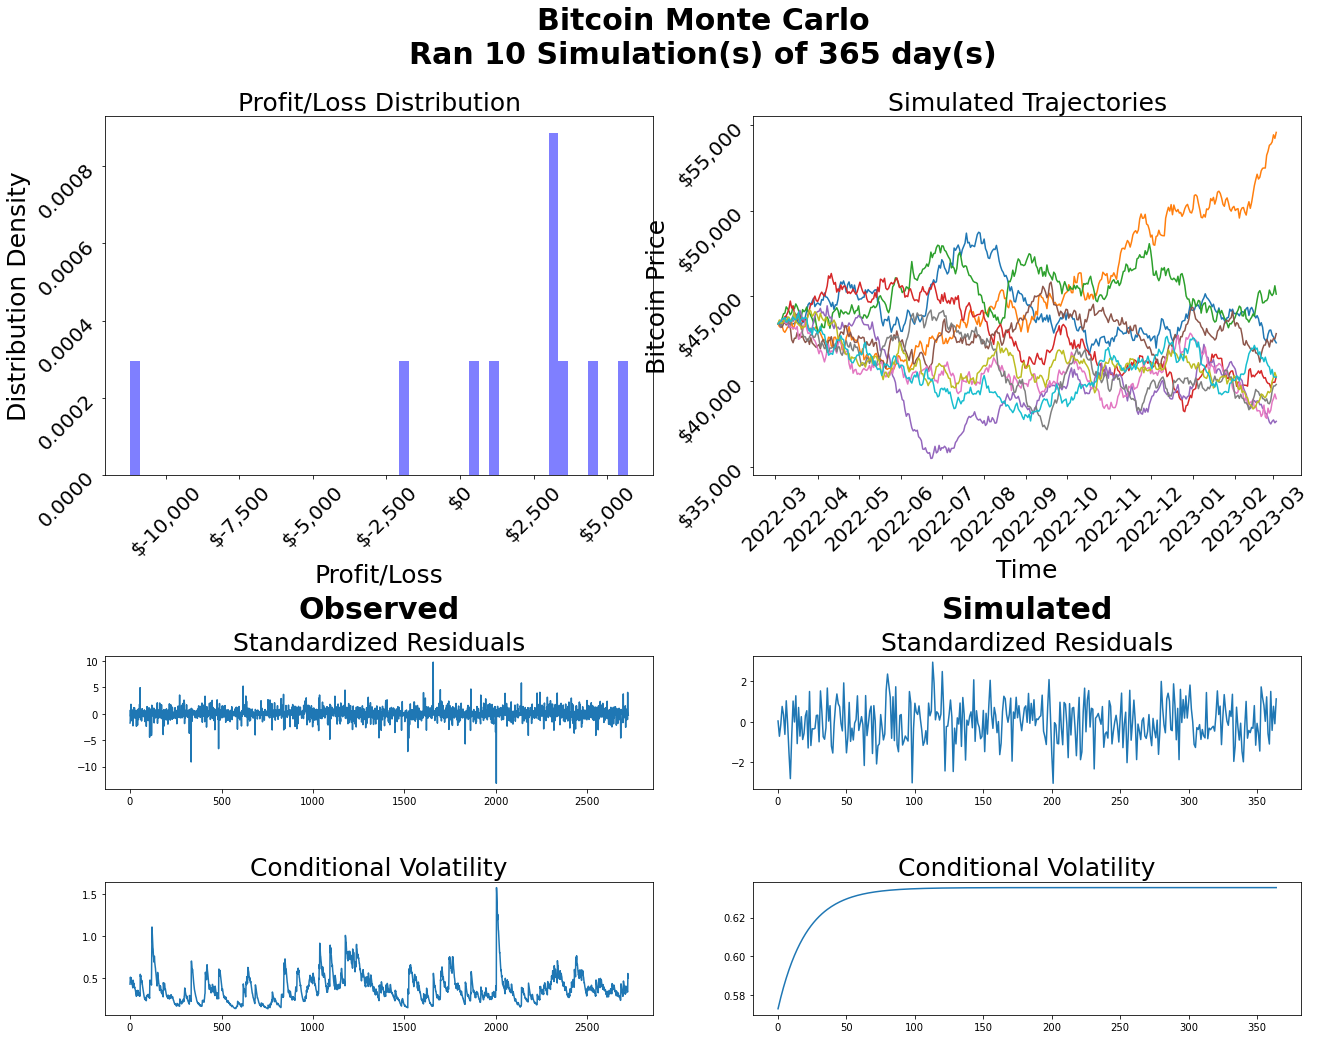

In [3]:
arch_garch = dict(vol='GARCH', p=1, q=1, mean="Zero", rescale=True, dist='skewt') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()


Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10

10 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 9.68 second(s)
-------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $-650.39
Profit/Loss Ranges from $-25,164.76 - $9,220.98
Probability of Earning a Return = 60.00%
The VaR at 95% Confidence is: $-25,164.76
-------------------------------------------------------------------------


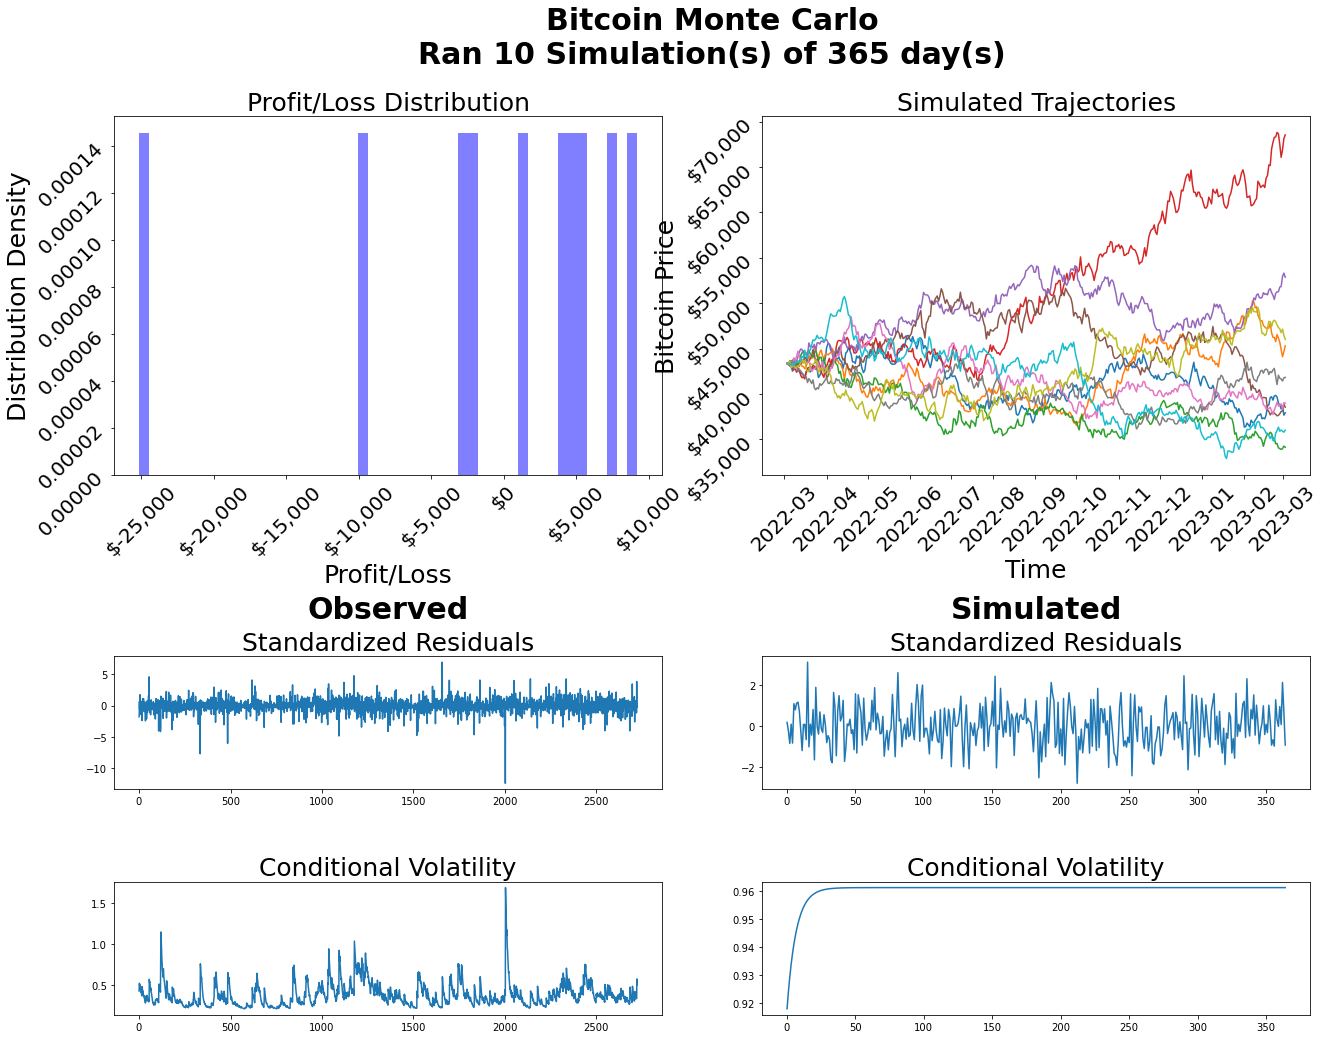

In [4]:
arch_garch = dict(vol='GARCH', p=1, q=1, mean="Constant", rescale=True, dist='normal') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()


# sigma^2_t = .0014 + .108 * return_(t-1)^2 + .892 * sigma^2_(t-1)


Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10

10 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 9.82 second(s)
-------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $-2,400.02
Profit/Loss Ranges from $-12,467.05 - $5,152.46
Probability of Earning a Return = 50.00%
The VaR at 95% Confidence is: $-12,467.05
-------------------------------------------------------------------------


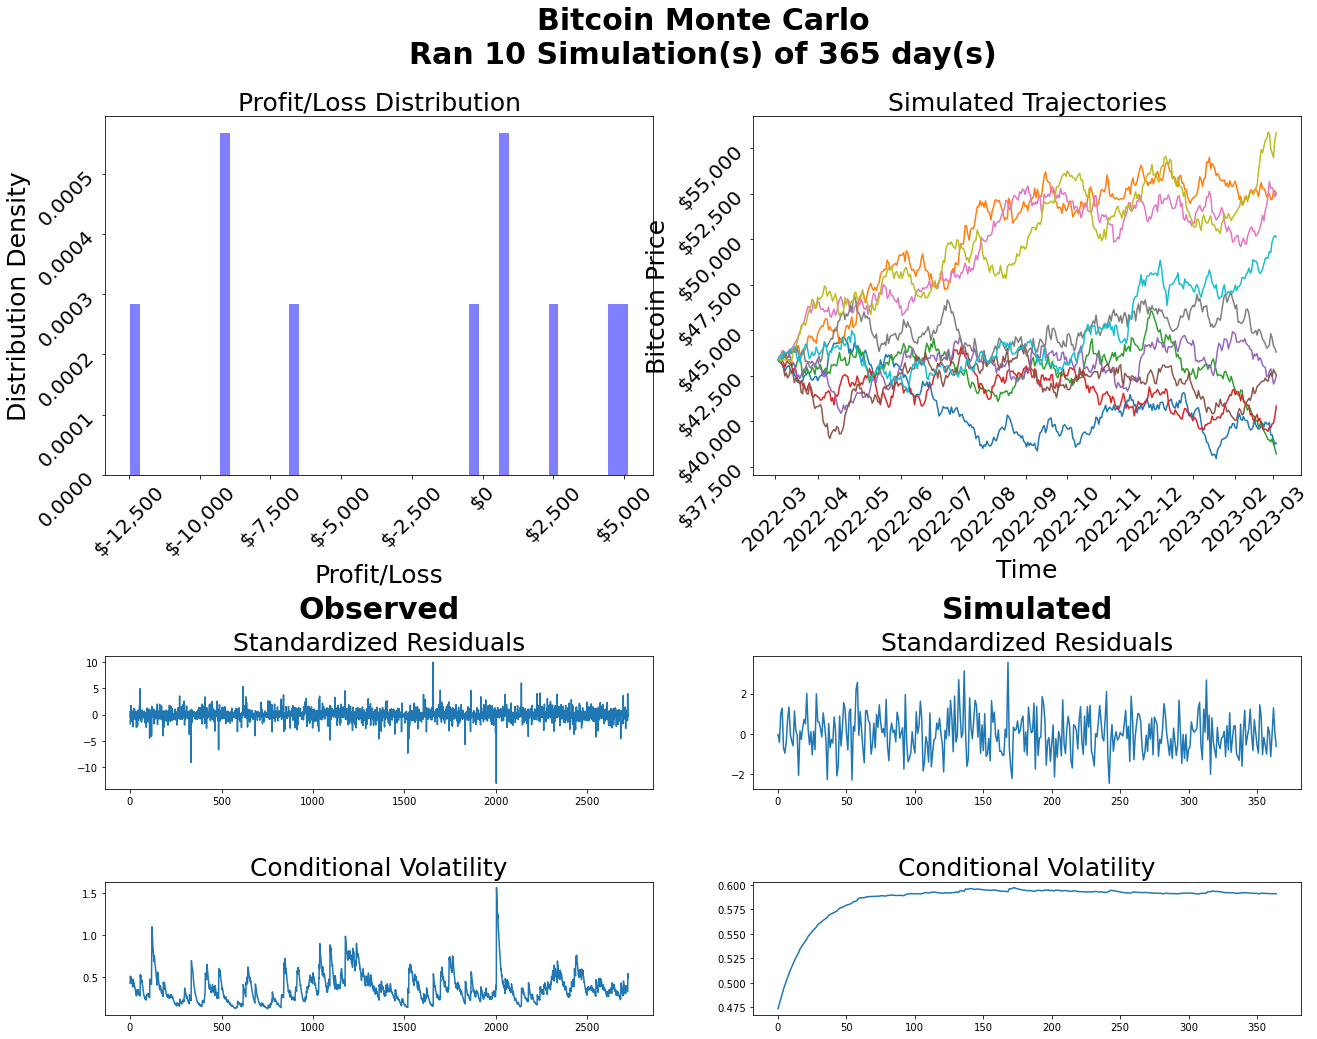

In [5]:
arch_garch = dict(vol='GARCH', p=1, q=1, mean="Constant", rescale=True, dist='t') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()


mu          0.014314
omega       0.001430
alpha[1]    0.108544
beta[1]     0.891456
eta         3.292241
lambda     -0.022848
Name: params, dtype: float64
Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10

10 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 9.54 second(s)
-------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $-2,571.61
Profit/Loss Ranges from $-9,787.86 - $7,133.49
Probability of Earning a Return = 30.00%
The VaR at 95% Confidence is: $-9,787.86
-------------------------------------------------------------------------


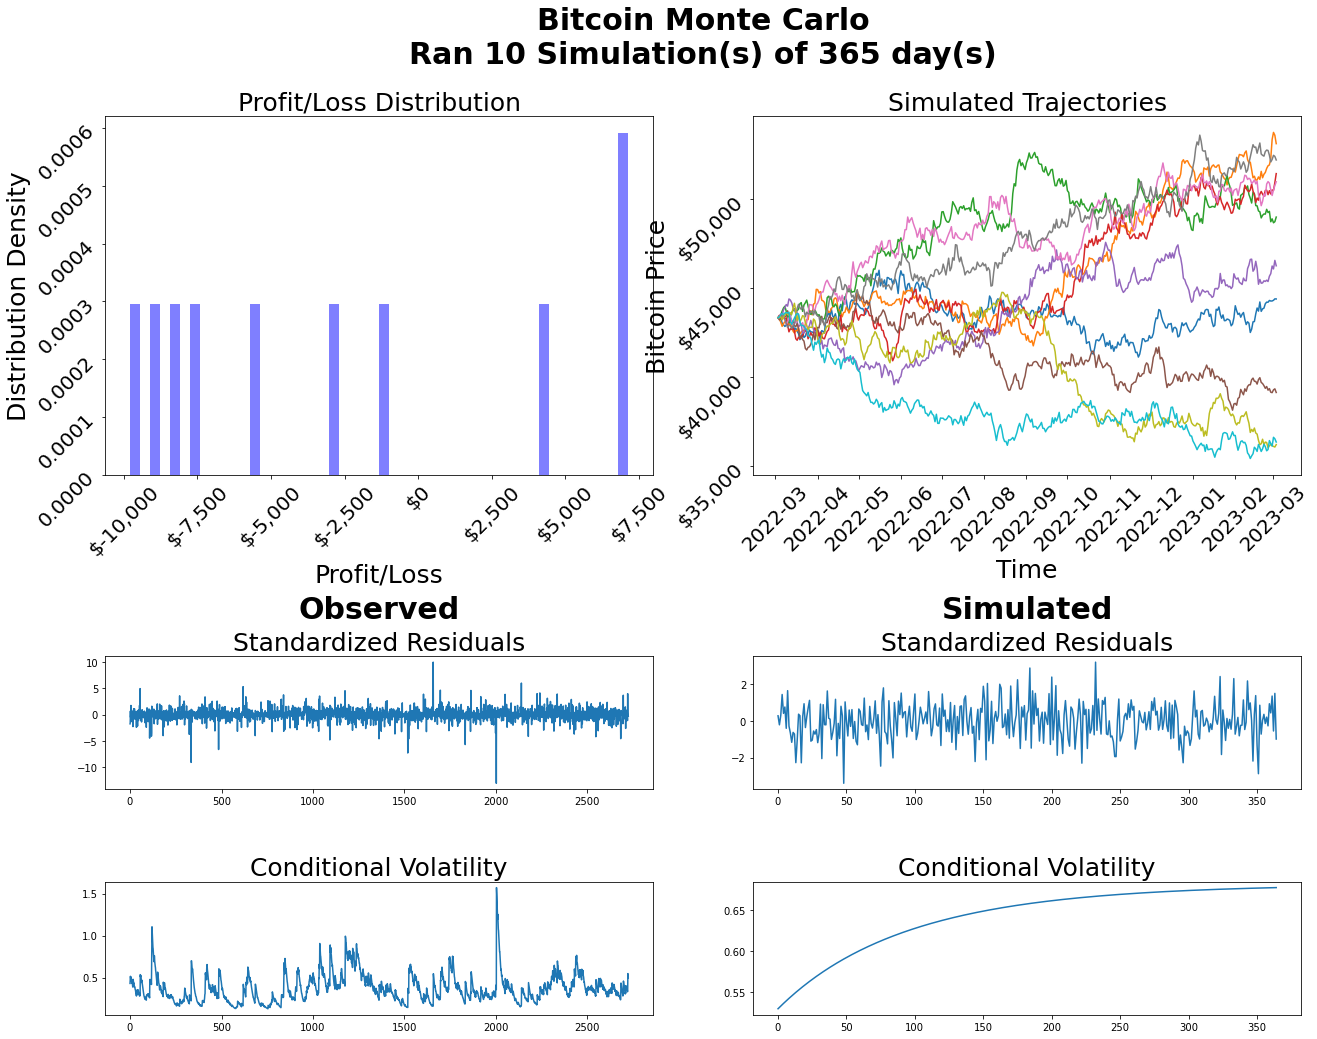

In [6]:
arch_garch = dict(vol='GARCH', p=1, q=1, mean="Constant", rescale=True, dist='skewt') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()
